<a href="https://colab.research.google.com/github/namoshi/colab/blob/master/P2Pmatching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

In [7]:
def calc_cost(start: np.ndarray, end: np.ndarray) -> np.ndarray:
    cost = np.zeros((len(start), len(end)))

    for i in range(len(start)):
        for j in range(len(end)):
            cost[i, j] = np.linalg.norm(start[i] - end[j]) ** 2

    return cost

In [8]:
def solve_transport_problem(
    C: np.ndarray,
    a: np.ndarray,
    b: np.ndarray,
) -> np.ndarray:
    num_x = len(a)
    num_y = len(b)

    c = C.flatten()
    A = []

    # \sum_{j}P_{i, j} = a_i
    for i in range(num_x):
        A_i = np.zeros((num_x, num_y))
        A_i[i, :] = 1
        A.append(A_i.flatten())

    # \sum_{i}P_{i, j} = b_j
    for j in range(num_y):
        A_j = np.zeros((num_x, num_y))
        A_j[:, j] = 1
        A.append(A_j.flatten())

    A = np.array(A)
    b = np.concatenate([a, b])

    res = linprog(c, A_eq=A, b_eq=b, method="highs")
    P = res.x.reshape((num_x, num_y))

    return P


In [10]:
def plot_transport(start: np.ndarray, end: np.ndarray, P: np.ndarray):
    plt.figure()
    plt.scatter(start[:, 0], start[:, 1], c="r", label="start")
    plt.scatter(end[:, 0], end[:, 1], c="b", label="end")

    for i in range(P.shape[0]):
        for j in range(P.shape[1]):
            if P[i, j] > 0:
                plt.annotate(
                    "",
                    xy=end[j],
                    xytext=start[i],
                    arrowprops=dict(arrowstyle="->", color="k", lw=1),
                )

    plt.show()


P:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Minimum Cost:  1.9596573924880432


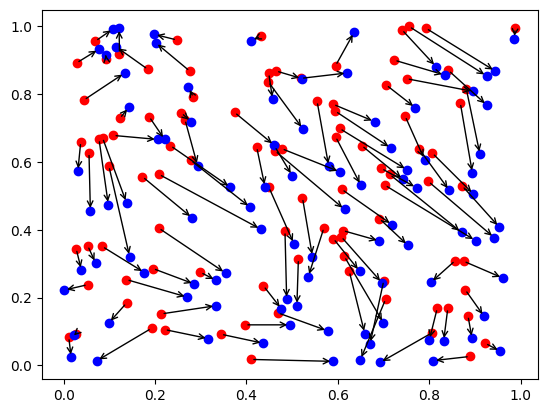

In [35]:
if __name__ == "__main__":
#    start = np.array([[2.2, 2.1], [3.2, 5.3], [4.5, 4.4], [3.1, 3.8]])
#    end = np.array([[3.0, 5.0], [4.1, 3.3], [3.0, 3.5], [3.4, 2.5]])
    N = 100
    start = np.random.rand(N, 2)
    end = np.random.rand(N,2)

#    print(start, end)

#    a = np.ones(4) / 4
#    b = np.ones(4) / 4
    a = np.ones(N)
    b = np.ones(N)

    C = calc_cost(start, end)

    P = solve_transport_problem(C, a, b)
    print("P: ", P)
    print("Minimum Cost: ", np.sum(P * C))

    plot_transport(start, end, P)